In [1]:
import pandas as pd
import feather
import seaborn as sns
import matplotlib.pyplot as plt

# read in the data
df = feather.read_dataframe("../data/Lab1/sample.feather").dropna()

# describe our data
df.describe()

,index,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickupX,pickupY,dropoffX,dropoffY
count,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,...,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,98195.000000,9.819500e+04,9.819500e+04,9.819500e+04,9.819500e+04
mean,50003.497184,1.532654,1.709079,2.821277,-73.975085,40.749306,1.020958,-73.976504,40.750403,1.338530,...,0.605795,0.499119,1.790711,0.230021,0.299771,16.085542,-8.234869e+06,4.975435e+06,-8.235027e+06,4.975597e+06
std,28860.003033,0.498935,1.308925,3.330308,0.037463,0.026843,0.188657,0.028106,0.031279,0.486602,...,0.226626,0.024444,2.218994,1.131172,0.011366,11.412770,4.170389e+03,3.943435e+03,3.128708e+03,4.595988e+03
min,0.000000,1.000000,0.000000,0.000000,-74.084488,40.583759,1.000000,-74.215378,40.523975,1.000000,...,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-80.300000,-8.247047e+06,4.951139e+06,-8.261618e+06,4.942380e+06
25%,25011.500000,1.000000,1.000000,1.040000,-73.992615,40.735245,1.000000,-73.991871,40.732176,1.000000,...,0.500000,0.500000,0.000000,0.000000,0.300000,9.300000,-8.236820e+06,4.973368e+06,-8.236737e+06,4.972918e+06
50%,50000.000000,2.000000,1.000000,1.710000,-73.982658,40.751526,1.000000,-73.981621,40.750919,1.000000,...,0.500000,0.500000,1.460000,0.000000,0.300000,12.800000,-8.235712e+06,4.975761e+06,-8.235596e+06,4.975671e+06
75%,74993.500000,2.000000,2.000000,3.100000,-73.970203,40.766073,1.000000,-73.965614,40.769094,2.000000,...,0.500000,0.500000,2.550000,0.000000,0.300000,18.360000,-8.234325e+06,4.977899e+06,-8.233815e+06,4.978343e+06
max,99999.000000,2.000000,6.000000,91.200000,-73.674927,40.879520,5.000000,-73.606102,41.007378,4.000000,...,1.500000,0.500000,115.000000,24.000000,0.300000,550.300000,-8.201455e+06,4.994587e+06,-8.193794e+06,5.013430e+06


- Remember that not all the data should be interpreted as purely numerical...
- There may be conclusions you can draw *by coincidence* if you incorrectly assume data types!
    - `longitude` and `latitude` should be interpreted as geospatial coordinates
    - `payment_type` is a discrete category of payment types
    - `trip_distance` is non-linear (not a straight line from A to B), but we have no further data on it

### Histogram plots for Trip Distance

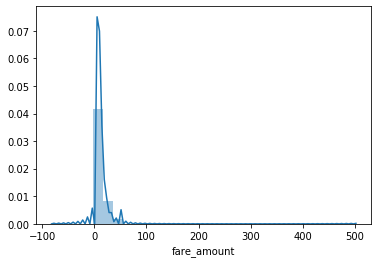

In [2]:
from numpy import log, sqrt

# apply a log transformation for all x non-zero x points, else 0
sns.distplot(df['fare_amount'], bins=30)

plt.show()

- I guess we can kind of see most fares are between 0 - 100
- Hard to tell where the main distribution is spread around 
- Why are there negative values...?

- Take a log transformation to visually see the distribution
- Now we see most the values fall under `exp(x)`, majority between `$7` - `$55` (`exp(2)` - `exp(55)`)

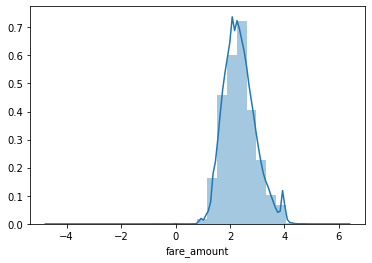

In [3]:
from numpy import log, sqrt

# apply a log transformation for all x non-zero x points, else 0
sns.distplot(df['fare_amount'].apply(lambda x: log(x) if x else 0), bins=30)
plt.show()

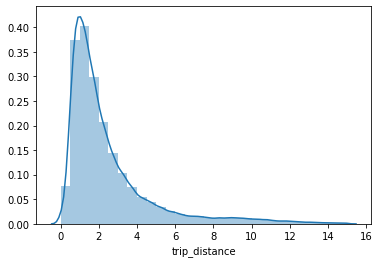

In [4]:
# df.loc[CONDITION, COLUMN(s)]
data = df.loc[df['trip_distance'] <= 15, 'trip_distance']

sns.distplot(data, bins=30)
plt.show()

Instant insights:
- Fare distances are predominantly very short, between 1-3km
- There seems to be a fare number of outliers for trips > 15km
- Perhaps we should do a correlation check. Recall that we had negative fares for some reason

In [5]:
# pearson (by default) correlation table for distance and fare amount
df[['trip_distance','fare_amount']].corr(method='pearson')

,trip_distance,fare_amount
trip_distance,1.000000,0.922548
fare_amount,0.922548,1.000000


In [6]:
# correlation table
df.corr()

,index,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickupX,pickupY,dropoffX,dropoffY
index,1.000000,0.004659,0.012670,0.040882,-0.024993,-0.052560,-0.002280,0.016804,-0.031594,0.001459,...,-0.663456,-0.006212,0.003820,-0.009825,-0.006739,0.001969,-0.024993,-0.052571,0.016804,-0.031575
VendorID,0.004659,1.000000,0.255434,0.017784,0.015889,0.002392,-0.005973,0.006230,0.003227,-0.015373,...,0.014907,0.001732,0.011374,0.009194,-0.018884,0.011115,0.015889,0.002397,0.006230,0.003230
passenger_count,0.012670,0.255434,1.000000,0.002791,0.001539,0.000246,-0.008425,-0.012015,0.001379,0.016274,...,-0.003906,0.009178,-0.010094,0.008723,0.002502,0.002213,0.001539,0.000244,-0.012015,0.001374
trip_distance,0.040882,0.017784,0.002791,1.000000,0.627729,-0.344116,0.396443,0.296985,-0.121316,-0.054209,...,-0.225228,0.009635,0.530393,0.584555,0.014355,0.918708,0.627729,-0.343925,0.296985,-0.121086
pickup_longitude,-0.024993,0.015889,0.001539,0.627729,1.000000,-0.148628,0.398665,0.282294,0.052073,0.019310,...,-0.167951,-0.026853,0.307750,0.480505,-0.004853,0.558125,1.000000,-0.148331,0.282294,0.052144
pickup_latitude,-0.052560,0.002392,0.000246,-0.344116,-0.148628,1.000000,-0.289548,0.086079,0.417507,0.036553,...,0.179365,0.020445,-0.171573,-0.130846,0.002952,-0.306000,-0.148628,1.000000,0.086079,0.417497
RatecodeID,-0.002280,-0.005973,-0.008425,0.396443,0.398665,-0.289548,1.000000,0.145514,-0.013398,0.009352,...,-0.279332,-0.391286,0.223387,0.311375,-0.046205,0.438094,0.398665,-0.289399,0.145514,-0.013329
dropoff_longitude,0.016804,0.006230,-0.012015,0.296985,0.282294,0.086079,0.145514,1.000000,0.273058,0.033341,...,-0.047530,-0.042311,0.129589,0.146775,-0.008999,0.264586,0.282294,0.086183,1.000000,0.273232
dropoff_latitude,-0.031594,0.003227,0.001379,-0.121316,0.052073,0.417507,-0.013398,0.273058,1.000000,0.061725,...,0.047861,0.010228,-0.122946,-0.046102,0.004527,-0.149934,0.052073,0.417579,0.273058,1.000000
payment_type,0.001459,-0.015373,0.016274,-0.054209,0.019310,0.036553,0.009352,0.033341,0.061725,1.000000,...,-0.006726,-0.057978,-0.561432,-0.023543,-0.068284,-0.165556,0.019310,0.036575,0.033341,0.061722


- Numbers are cool, but lets also do a visualisation.

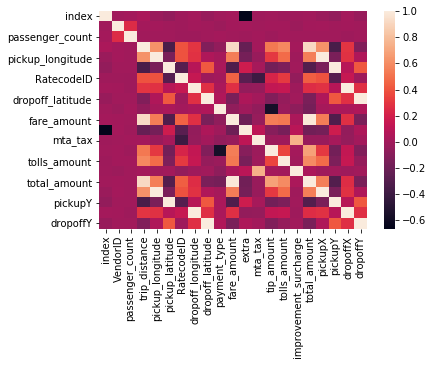

In [7]:
sns.heatmap(df.corr())
# wow that's easy...

plt.show()

- trip distance highly correlates with high tips, tolls and overall trip amount
- payment type seems to have some form of negative correlation with tip amount. Gotta be careful as this is a discrete category


### Binning Methods
Sturges:  
- $bins = ceil(log_2(n)) + 1$

Rice:
- $bins = 2\times\sqrt[3]{n}$

Scott:
- $bins = \frac{max - min}{3.5\times \frac{SD}{\sqrt[3]{n}}}$

Freedman:
- $bins = \frac{max - min}{2\times \frac{IQR}{\sqrt[3]{n}}}$

Square:
- $bins = \sqrt{n}$

https://www.answerminer.com/blog/binning-guide-ideal-histogram

In [8]:
# dataframes method that may be of use
MAX = df['fare_amount'].max()
MIN = df['fare_amount'].min()
SD = df['fare_amount'].std()
IQR = df['fare_amount'].quantile()
N = len(df)

In [9]:
def sturges(x):
    from numpy import log2
    return int(log2(x)) + 1

def rice(x):
    return int(2 * x ** (1/3))

def scott(large, small, sd, x):
    return int((large - small) / (3.5 * (sd/x ** (1/3))))

def freedman(large, small, iqr, x):
    return int((large - small) / (2 * (iqr/x ** (1/3))))
    
def square(x):
    return int(sqrt(x))

# return log(x) if x is non zero else 0
def logify(x):
    return log(x) if x else 0

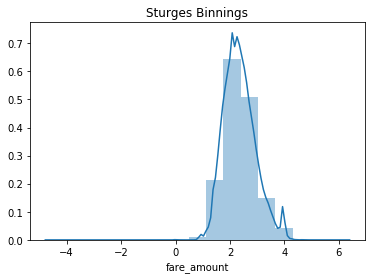

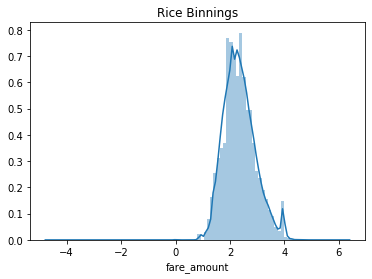

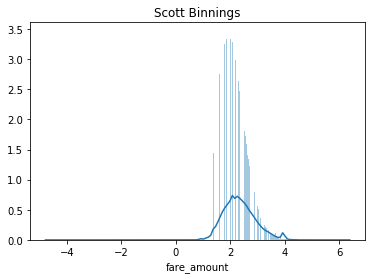

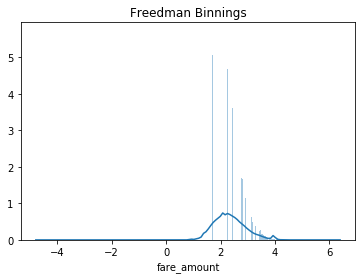

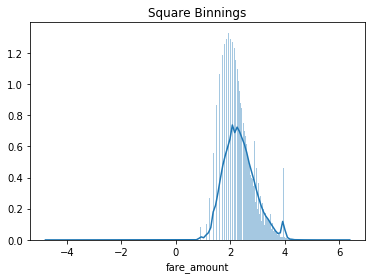

In [10]:
fig1 = sns.distplot(df['fare_amount'].apply(logify), bins=sturges(N))
plt.title("Sturges Binnings")
plt.show()

fig2 = sns.distplot(df['fare_amount'].apply(logify), bins=rice(N))
plt.title("Rice Binnings")
plt.show()

fig3 = sns.distplot(df['fare_amount'].apply(logify), bins=scott(MAX, MIN, SD, N))
plt.title("Scott Binnings")
plt.show()

fig4 = sns.distplot(df['fare_amount'].apply(logify), bins=freedman(MAX, MIN, IQR, N))
plt.title("Freedman Binnings")
plt.show()

fig5 = sns.distplot(df['fare_amount'].apply(logify), bins=square(N))
plt.title("Square Binnings")
plt.show()

- Rice's method for binning looks good **for this plot**
- Not always the case, keep that in mind...

### General things
- Keep in mind that if your work now on visualisation is planned ahead, your work in the next two projects will be much easier
- Generally, work with attributes which have some form of correlation or interesting data that you can join with external data to draw new conclusions
- Consider how you might go about predicting said attributes...